# MISSING VALUES

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [5]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [6]:
train.shape

(1460, 81)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
#Let's look missing data
missing_data= train.isnull().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]
data_types = train.dtypes[missing_data.index]

# Combine into a DataFrame
missing_data_df = pd.DataFrame({'Missing Data': missing_data, 'Data Type': data_types})

# Display the result
print(missing_data_df)

              Missing Data Data Type
PoolQC                1453    object
MiscFeature           1406    object
Alley                 1369    object
Fence                 1179    object
FireplaceQu            690    object
LotFrontage            259   float64
GarageYrBlt             81   float64
GarageCond              81    object
GarageType              81    object
GarageFinish            81    object
GarageQual              81    object
BsmtFinType2            38    object
BsmtExposure            38    object
BsmtQual                37    object
BsmtCond                37    object
BsmtFinType1            37    object
MasVnrArea               8   float64
MasVnrType               8    object
Electrical               1    object


In [9]:
impute_with_no = ["Alley", "MasVnrType", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond",
                  "PoolQC", "Fence", "MiscFeature", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]

for col in impute_with_no:
    train[col] = train[col].fillna(value="No")
    test[col] = test[col].fillna(value="No")

In [10]:
train["Electrical"] = train["Electrical"].fillna(value=train["Electrical"].mode()[0])
test["Electrical"] = test["Electrical"].fillna(value=test["Electrical"].mode()[0])

In [11]:
num_missing_columns=['LotFrontage','GarageYrBlt','MasVnrArea']
for col in num_missing_columns:
    train[col] = train[col].fillna(value=train[col].mean())
    test[col] = test[col].fillna(value=test[col].mean())

In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit_transform(test)


array([[1461, 20, 'RH', ..., 2010, 'WD', 'Normal'],
       [1462, 20, 'RL', ..., 2010, 'WD', 'Normal'],
       [1463, 60, 'RL', ..., 2010, 'WD', 'Normal'],
       ...,
       [2917, 20, 'RL', ..., 2006, 'WD', 'Abnorml'],
       [2918, 85, 'RL', ..., 2006, 'WD', 'Normal'],
       [2919, 60, 'RL', ..., 2006, 'WD', 'Normal']], dtype=object)

# Outliers

In [13]:
# Importing
import sklearn
from sklearn.datasets import load_diabetes


# Load the dataset
diabetics = load_diabetes()

# Create the dataframe
column_name = diabetics.feature_names
df_diabetics = pd.DataFrame(diabetics.data)
df_diabetics.columns = column_name
print(df_diabetics.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641  


In [14]:
df_diabetics.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


C:\Users\vnod4\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

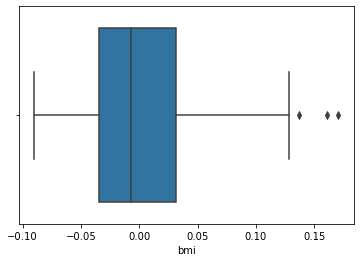

In [15]:
import seaborn as sns
sns.boxplot(df_diabetics['bmi'])

C:\Users\vnod4\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


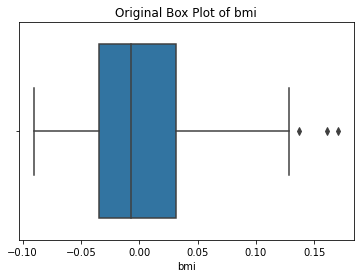

C:\Users\vnod4\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


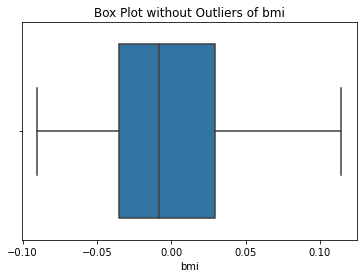

In [16]:
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = df[df[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers


threshold_value = 0.12

no_outliers = removal_box_plot(df_diabetics, 'bmi', threshold_value)

In [17]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_diabetics['age']))
print(z)

0      0.800500
1      0.039567
2      1.793307
3      1.872441
4      0.113172
         ...   
437    0.876870
438    0.115937
439    0.876870
440    0.956004
441    0.956004
Name: age, Length: 442, dtype: float64


In [18]:
threshold_z = 2

outlier_indices = np.where(z > threshold_z)[0]
no_outliers = df_diabetics.drop(outlier_indices)
print("Original DataFrame Shape:", df_diabetics.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers.shape)

Original DataFrame Shape: (442, 10)
DataFrame Shape after Removing Outliers: (426, 10)


In [19]:
# IQR
Q1 = np.percentile(df_diabetics['bmi'], 25, method='midpoint')
Q3 = np.percentile(df_diabetics['bmi'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

0.06520763046979455


In [20]:
# Above Upper bound
upper = Q3+1.5*IQR
upper_array = np.array(df_diabetics['bmi'] >= upper)
print("Upper Bound:", upper)
print(upper_array.sum())

# Below Lower bound
lower = Q1-1.5*IQR
lower_array = np.array(df_diabetics['bmi'] <= lower)
print("Lower Bound:", lower)
print(lower_array.sum())

Upper Bound: 0.1287900081177747
3
Lower Bound: -0.13204051376140352
0


In [22]:
# IQR
# Calculate the upper and lower limits
Q1 = df_diabetics['bmi'].quantile(0.25)
Q3 = df_diabetics['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df_diabetics['bmi'] >= upper)[0]
lower_array = np.where(df_diabetics['bmi'] <= lower)[0]

# Removing the outliers
df_diabetics.drop(index=upper_array, inplace=True)
df_diabetics.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df_diabetics.shape)

New Shape:  (439, 10)


# Feature scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler

df_test = pd.read_csv("big_mart_test.csv")
df_train = pd.read_csv("big_mart_train.csv")

In [24]:
df_train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [25]:
# seprating numerical columns to scale
numerical_df_train = df_train[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']]
numerical_df_test = df_test[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']]

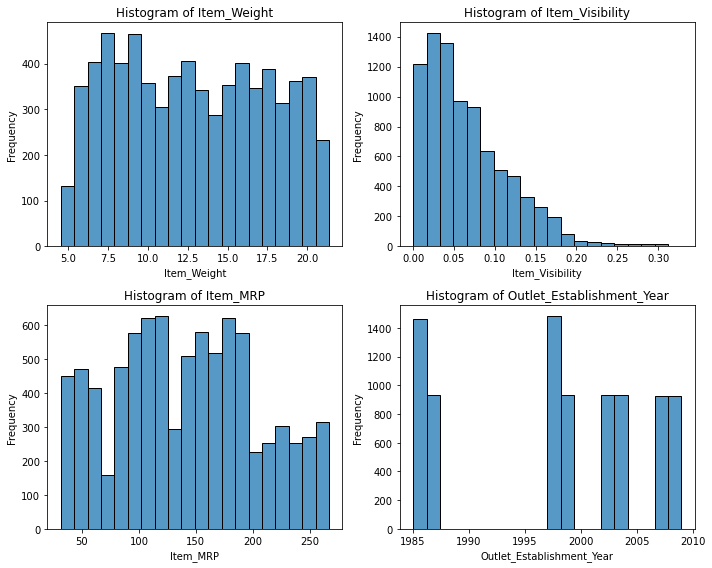

In [26]:
# Set up the matplotlib figure with a 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each column and plot a histogram
for i, column in enumerate(numerical_df_train):
    sns.histplot(numerical_df_train[column], ax=axes[i], bins=20, kde=False)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [27]:
# fit scaler on training data
norm = MinMaxScaler().fit(numerical_df_train)

# transfrom training data
df_train_norm = norm.transform(numerical_df_train)

# transform testing data
df_test_norm = norm.transform(numerical_df_test)

In [30]:
df_train_stand2 = numerical_df_train.copy()
df_test_stand2 = numerical_df_test.copy()

In [31]:
from sklearn.preprocessing import StandardScaler

# fit scaler on training data
scale = StandardScaler().fit(df_train_stand2)

# transform training data
train_stand = scale.transform(df_train_stand2)

# transform testing data
test_stand = scale.transform(df_test_stand2)

In [36]:
train_stand = pd.DataFrame(train_stand)
test_stand = pd.DataFrame(test_stand)

In [38]:
# Rename the columns
new_column_names = {0: 'Item_Weight',
                    1: 'Item_Visibility',
                    2: 'Item_MRP',
                   3: 'Outlet_Establishment_Year'}

train_stand.rename(columns=new_column_names, inplace=True)
test_stand.rename(columns=new_column_names, inplace=True)

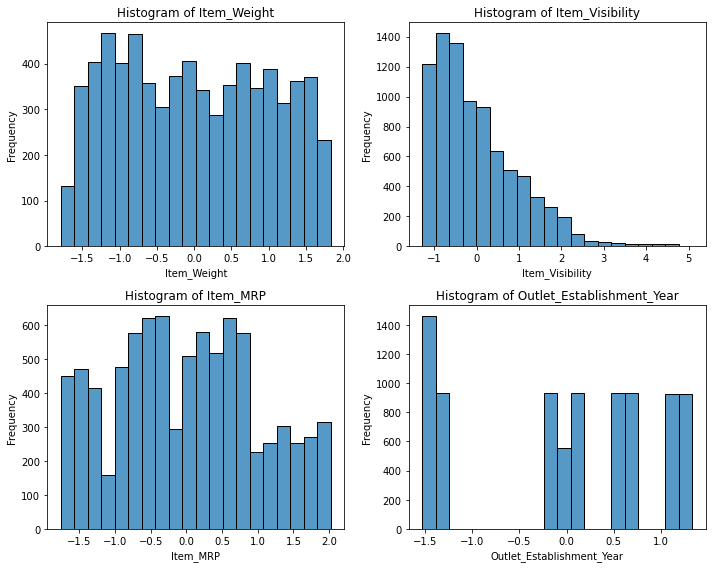

In [39]:
# Set up the matplotlib figure with a 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each column and plot a histogram
for i, column in enumerate(train_stand):
    sns.histplot(train_stand[column], ax=axes[i], bins=20, kde=False)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()